# Fast Text , Word embeddings and Word cloud

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('movie.metadata.tsv', sep = '\t',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [4]:
dfsum = pd.read_csv('plot_summaries.txt',sep='\t',header=None)

In [5]:
dfsum

,0,1
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


In [6]:
col2 = ['id1','plot']

In [7]:
dfsum.columns=col2

In [8]:
dfsum

,id1,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


In [13]:
df1 = df[['id1','Genres']]

In [14]:
df1

,id1,Genres
0,975900,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,"{""/m/07s9rl0"": ""Drama""}"
...,...,...
81736,35228177,"{""/m/07s9rl0"": ""Drama""}"
81737,34980460,"{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,"{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [17]:
for i in range(len(df1)):
    j_data = json.loads(df1['Genres'][i])
    df1['Genres'][i]=list(j_data.values())

In [18]:
df1

,id1,Genres
0,975900,"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,"[Crime Fiction, Drama]"
3,9363483,"[Thriller, Erotic thriller, Psychological thri..."
4,261236,[Drama]
...,...,...
81736,35228177,[Drama]
81737,34980460,"[Biographical film, Drama, Documentary]"
81738,9971909,"[Satire, Comedy]"
81739,913762,"[Science Fiction, Japanese Movies, Adventure, ..."


In [19]:
mer_df = pd.merge(df1,dfsum , on='id1',how='inner')

In [20]:
mer_df

,id1,Genres,plot
0,975900,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,9363483,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
2,261236,[Drama],"Eva, an upper class housewife, becomes frustra..."
3,18998739,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
4,6631279,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a..."
...,...,...,...
42199,23851782,"[Crime Fiction, Thriller, Comedy, Supernatural]",{{plot}} The film opens with a Great Western e...
42200,35228177,[Drama],Two former National Oceanic Atmospheric Admini...
42201,34980460,"[Biographical film, Drama, Documentary]",{{No plot}} This film follows 12 years in the ...
42202,913762,"[Science Fiction, Japanese Movies, Adventure, ...","The story takes place in the year 2092,The Sup..."


In [16]:
import json

In [10]:
columns = ['id1','id2','Title','Release_date','Revenue','Runtime','Language','Country','Genres']

In [11]:
df.columns = columns

In [12]:
df

,id1,id2,Title,Release_date,Revenue,Runtime,Language,Country,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [21]:
# cleaning

In [22]:
import re
import nltk
import spacy

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [24]:
nlp=spacy.load('en_core_web_lg')

In [25]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\AARATI
[nltk_data]     MAURYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\AARATI
[nltk_data]     MAURYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
def clean_n_normal(text): # func to clean and normalize the text in plot
    text = text.lower() # cnvert to lower
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove unwanted char and digit
    tokens = word_tokenize(text) # tokenize 
    stop_words = set(stopwords.words('english')) # removng stopwords
    fil_tk = [token for token in tokens if token not in stop_words]
    normal_txt = ' '.join(fil_tk) # joing back to form normalze txt
    
    doc = nlp(normal_txt) #lemma with spacy
    norm_tk = [token.lemma_ for token in doc]
    normal_txt = ' '.join(norm_tk) #joing the tokenized txt to normal txt
    return normal_txt

In [27]:
mer_df['cln_plot'] = mer_df['plot'].apply(clean_n_normal)

In [28]:
mer_df

,id1,Genres,plot,cln_plot
0,975900,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",set second half nd century film depict mars pl...
1,9363483,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...,series murder rich young woman throughout ariz...
2,261236,[Drama],"Eva, an upper class housewife, becomes frustra...",eva upper class housewife become frustrated le...
3,18998739,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns...",every hundred year evil morgana return claim f...
4,6631279,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a...",adam san franciscobased artist work cab driver...
...,...,...,...,...
42199,23851782,"[Crime Fiction, Thriller, Comedy, Supernatural]",{{plot}} The film opens with a Great Western e...,plot film open great western express speeding ...
42200,35228177,[Drama],Two former National Oceanic Atmospheric Admini...,two former national oceanic atmospheric admini...
42201,34980460,"[Biographical film, Drama, Documentary]",{{No plot}} This film follows 12 years in the ...,plot film follow year live irish traveller fam...
42202,913762,"[Science Fiction, Japanese Movies, Adventure, ...","The story takes place in the year 2092,The Sup...",story take place year super dimension fortress...


In [29]:
mer_df.drop('plot',axis=1,inplace=True)


In [30]:
mer_df

,id1,Genres,cln_plot
0,975900,"[Thriller, Science Fiction, Horror, Adventure,...",set second half nd century film depict mars pl...
1,9363483,"[Thriller, Erotic thriller, Psychological thri...",series murder rich young woman throughout ariz...
2,261236,[Drama],eva upper class housewife become frustrated le...
3,18998739,"[Family Film, Fantasy, Adventure, World cinema]",every hundred year evil morgana return claim f...
4,6631279,"[Romantic comedy, Ensemble Film, Comedy-drama,...",adam san franciscobased artist work cab driver...
...,...,...,...
42199,23851782,"[Crime Fiction, Thriller, Comedy, Supernatural]",plot film open great western express speeding ...
42200,35228177,[Drama],two former national oceanic atmospheric admini...
42201,34980460,"[Biographical film, Drama, Documentary]",plot film follow year live irish traveller fam...
42202,913762,"[Science Fiction, Japanese Movies, Adventure, ...",story take place year super dimension fortress...


In [ ]:
from collections import Counter

In [ ]:
mer_df['Genres'].value_counts()

In [31]:
import fasttext

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_df, test_df = train_test_split(mer_df.drop(['id1'], axis=1), test_size=0.2, random_state=13)

In [ ]:
#train_data = []
#with open('concept_train1.txt', 'w', encoding='utf-8') as train_file:

    #for i, row in train_df.iterrows():

        #labels = ' '.join(f'__label__ {Genres.replace(" ", "_")}' for Genres in row['Genres'])

        #line = f"{labels} {row['cln_plot']}\n"

        #train_file.write(line)

        #train_data.append(line)



In [ ]:
#test_data = []
#with open('concept_test1.txt', 'w', encoding='utf-8') as test_file:

 #   for i, row in test_df.iterrows():        

  #      labels =" ".join(f' _label_{Genres1.replace("", "_")}' for Genres1 in row['Genres'])

   #     line = f"{labels} {row['cln_plot']}\n"

    #    test_file.write(line)

     #   test_data.append(line)

In [ ]:
# Step 3: Train and evaluate the FastText model for different epochs

#for i in [20, 25, 30]:

 #   model_sup =fasttext.train_supervised (input='concept_train1.txt', lr=0.5, epoch=i, wordNgrams=3, bucket=20000)

  #  result =model_sup.test('concept_test1.txt', k=1, threshold=0.1)

   # test_num, precision, recall = result

    #f_score= 2*precision * recall / (precision + recall)
    #print (f"Epoch: {i}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f_score:.2f}")
                                          
                                          

# Step 4: Print words and Labels from the trained model
#for word, label in zip(model_sup.words, model_sup.labels):
 #   print (word, label)
                                          


In [ ]:
#print(precision)

In [34]:
train_data = []
with open('concept_train2.txt', 'w', encoding='utf-8') as train_file:

    for i, row in train_df.iterrows():

        labels = ' '.join(f'__label__ {genre.replace(" ", "_")}' for Genres in row['Genres'])

        line = f"{labels} {row['cln_plot']}\n"

        train_file.write(line)

        train_data.append(line)
        
        
        
test_data = []
with open('concept_test2.txt', 'w', encoding='utf-8') as test_file:

    for i, row in test_df.iterrows():        

        labels =" ".join(f' _label_{genre.replace("", "_")}' for Genres1 in row['Genres'])

        line = f"{labels} {row['cln_plot']}\n"

        test_file.write(line)

        test_data.append(line)
        
        
# Step 3: Train and evaluate the FastText model for different epochs

for i in [20, 25, 30]:

    model_sup =fasttext.train_supervised (input='concept_train2.txt', lr=0.5, epoch=i, wordNgrams=3, bucket=20000)

    result =model_sup.test('concept_test2.txt', k=1, threshold=0.1)

    test_num, precision, recall = result

    f_score= 2*precision * recall / (precision + recall)
    print (f"Epoch: {i}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f_score:.2f}")
                                          
                                          

# Step 4: Print words and Labels from the trained model
for word, label in zip(model_sup.words, model_sup.labels):
    print (word, label)        
        
        
        
        

Epoch: 20, Precision: nan, Recall: nan, F1 Score: nan
Epoch: 25, Precision: nan, Recall: nan, F1 Score: nan
Epoch: 30, Precision: nan, Recall: nan, F1 Score: nan
</s> __label__


In [37]:
train_data = []
with open('concept_train3.txt', 'w', encoding='utf-8') as train_file:
    for i, row in train_df.iterrows():
        labels = ' '.join(f'__label__{genre.replace(" ", "_")}' for genre in row['Genres'])
        line = f'{labels} {row["cln_plot"]}\n'
        train_file.write(line)
        train_data.append(line)

# Step 2: Prepare the testing data file
test_data = []
with open('concept_test3.txt', 'w', encoding='utf-8') as test_file:
    for i, row in test_df.iterrows():
        labels = ' '.join(f'__label__{genre.replace(" ", "_")}' for genre in row['Genres'])
        line = f'{labels} {row["cln_plot"]}\n'
        test_file.write(line)
        test_data.append(line)

# Step 3: Train and evaluate the FastText model for different epochs
for i in [20, 25, 30]:
    model_sup = fasttext.train_supervised(input='concept_train3.txt', lr=0.5, epoch=i, wordNgrams=3, bucket=20000)
    result = model_sup.test('concept_test3.txt', k=1, threshold=0.1)

    test_num, precision, recall = result
    f_score = 2 * precision * recall / (precision + recall)
    print(f"Epoch: {i}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f_score:.2f}")
    
for word, label in zip(model_sup.words, model_sup.labels):
    print(word, label)


Epoch: 20, Precision: 0.62, Recall: 0.17, F1 Score: 0.26
Epoch: 25, Precision: 0.61, Recall: 0.16, F1 Score: 0.26
Epoch: 30, Precision: 0.61, Recall: 0.16, F1 Score: 0.26
</s> __label__Drama
find __label__Comedy
take __label__Romance_Film
go __label__Thriller
one __label__Action
get __label__World_cinema
leave __label__Crime_Fiction
tell __label__Horror
kill __label__Black-and-white
man __label__Indie
make __label__Action/Adventure
back __label__Adventure
see __label__Family_Film
film __label__Short_Film
two __label__Romantic_drama
try __label__Animation
father __label__Musical
love __label__Science_Fiction
friend __label__Mystery
come __label__Romantic_comedy
become __label__Fantasy
time __label__Comedy_film
life __label__Crime_Thriller
return __label__War_film
give __label__Period_piece
new __label__Japanese_Movies
meet __label__Comedy-drama
day __label__Film_adaptation
end __label__Silent_film
home __label__Documentary
begin __label__Psychological_thriller
house __label__Western
fam

In [39]:
import numpy as np

In [42]:
for k in range(2, 6):
    for j in np.arange(0.1, 0.5, 0.9):
        result = model_sup.test('concept_test3.txt', k=k, threshold=j)

        test_num, precision, recall = result
        f_score = 2 * precision * recall / (precision + recall)
        print(f"Epoch: 20, k: {k:.1f},Threshold: {j:.1f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f_score:.2f}")
    
for word, label in zip(model_sup.words, model_sup.labels):
    print(word, label)

Epoch: 20, k: 2.0,Threshold: 0.1, Precision: 0.55, Recall: 0.25, F1 Score: 0.34
Epoch: 20, k: 2.0,Threshold: 0.2, Precision: 0.60, Recall: 0.17, F1 Score: 0.26
Epoch: 20, k: 2.0,Threshold: 0.3, Precision: 0.63, Recall: 0.11, F1 Score: 0.19
Epoch: 20, k: 2.0,Threshold: 0.4, Precision: 0.65, Recall: 0.07, F1 Score: 0.13
Epoch: 20, k: 2.0,Threshold: 0.5, Precision: 0.65, Recall: 0.05, F1 Score: 0.09
Epoch: 20, k: 2.0,Threshold: 0.6, Precision: 0.67, Recall: 0.04, F1 Score: 0.07
Epoch: 20, k: 2.0,Threshold: 0.7, Precision: 0.68, Recall: 0.02, F1 Score: 0.05
Epoch: 20, k: 2.0,Threshold: 0.8, Precision: 0.68, Recall: 0.01, F1 Score: 0.03
Epoch: 20, k: 2.0,Threshold: 0.9, Precision: 0.69, Recall: 0.01, F1 Score: 0.01
Epoch: 20, k: 2.0,Threshold: 1.0, Precision: nan, Recall: 0.00, F1 Score: nan
Epoch: 20, k: 3.0,Threshold: 0.1, Precision: 0.53, Recall: 0.28, F1 Score: 0.36
Epoch: 20, k: 3.0,Threshold: 0.2, Precision: 0.60, Recall: 0.17, F1 Score: 0.26
Epoch: 20, k: 3.0,Threshold: 0.3, Precisio

In [44]:
result = model_sup.test('concept_test3.txt', k=4, threshold=0.1)
result

(8354, 0.5262839147286822, 0.28427491903562435)

In [45]:
tx1 = 'This short documentary film tells the story of Alfari who lives on the bank of the Niger, a river that is slowly running dry due to climate change. Alfari had to give up fishing to become a garderner, fighting against the hippopotamus that devastates his plantations'

In [46]:
model_sup.predict(tx1,k=4)

(('__label__Short_Film',
  '__label__Drama',
  '__label__Documentary',
  '__label__Comedy_film'),
 array([0.58710629, 0.20097737, 0.08707556, 0.03477243]))

**Word embedding**

In [51]:
plot_summary = 'plot_summaries.txt'

In [52]:
skip_gram = fasttext.train_unsupervised(plot_summary,model='skipgram')

In [53]:
working_vector = skip_gram.get_word_vector('working')

In [54]:
working_neighbour = skip_gram.get_nearest_neighbors('working',k=5)

In [55]:
working_neighbour

[(0.8236305117607117, 'working,'),
 (0.8037137985229492, 'works'),
 (0.7924859523773193, 'workings'),
 (0.7837434411048889, 'non-working'),
 (0.7714254856109619, 'Working')]

In [56]:
cbow = fasttext.train_unsupervised(plot_summary,model='cbow')

In [57]:
working_vector = cbow.get_word_vector('working')

In [58]:
working_neighbour = cbow.get_nearest_neighbors('working',k=5)

In [59]:
working_neighbour

[(0.9125528335571289, 'non-working'),
 (0.885206401348114, 'hardworking'),
 (0.8653801083564758, 'workings'),
 (0.8627561926841736, 'Working'),
 (0.8616536259651184, 'hard-working')]

In [65]:
pip install gensim

     ---------------------------------------- 24.0/24.0 MB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
from gensim.models import FastText

In [70]:
tx2 = ['This short documentary film tells the story of Alfari who lives on the bank of the Niger, a river that is slowly running dry due to climate change. Alfari had to give up fishing to become a garderner, fighting against the hippopotamus that devastates his plantations']

In [72]:
tokens =[sent.lower().split() for sent in tx2]
tokens

[['this',
  'short',
  'documentary',
  'film',
  'tells',
  'the',
  'story',
  'of',
  'alfari',
  'who',
  'lives',
  'on',
  'the',
  'bank',
  'of',
  'the',
  'niger,',
  'a',
  'river',
  'that',
  'is',
  'slowly',
  'running',
  'dry',
  'due',
  'to',
  'climate',
  'change.',
  'alfari',
  'had',
  'to',
  'give',
  'up',
  'fishing',
  'to',
  'become',
  'a',
  'garderner,',
  'fighting',
  'against',
  'the',
  'hippopotamus',
  'that',
  'devastates',
  'his',
  'plantations']]

In [86]:
# create vocab
model = FastText(window=5, min_count=1, vector_size=100,sentences=tokens)
#model.build_vocab(sentences=tokens)

In [87]:
unique_words = model.wv.index_to_key
unique_words

['the',
 'to',
 'alfari',
 'a',
 'of',
 'that',
 'tells',
 'story',
 'film',
 'is',
 'who',
 'lives',
 'on',
 'bank',
 'documentary',
 'niger,',
 'short',
 'river',
 'plantations',
 'slowly',
 'his',
 'fishing',
 'devastates',
 'hippopotamus',
 'against',
 'fighting',
 'garderner,',
 'become',
 'up',
 'running',
 'give',
 'had',
 'change.',
 'climate',
 'due',
 'dry',
 'this']

In [88]:
len(unique_words)

37

In [90]:
model.train(corpus_iterable=tokens,total_examples=len(tokens),epochs=10)

(123, 460)

In [95]:
# List of misspelled words
wrong_spel = ['laptop', 'laaptoop', 'lappy', 'llaptap']

# Find most similar words for each misspelled word
for word in wrong_spel:
    print(word, ":", model.wv.most_similar(word))

laptop : [('film', 0.20272257924079895), ('change.', 0.14382581412792206), ('story', 0.14268463850021362), ('fishing', 0.10707813501358032), ('climate', 0.09130950272083282), ('slowly', 0.08235275000333786), ('on', 0.06849708408117294), ('is', 0.060929834842681885), ('bank', 0.05499318987131119), ('hippopotamus', 0.05245532467961311)]
laaptoop : [('who', 0.13396553695201874), ('short', 0.1288870871067047), ('story', 0.1208995133638382), ('against', 0.11977250874042511), ('running', 0.11342906951904297), ('documentary', 0.10581684857606888), ('hippopotamus', 0.10066535323858261), ('film', 0.08186995983123779), ('had', 0.07272817194461823), ('climate', 0.06464330852031708)]
lappy : [('short', 0.19235388934612274), ('garderner,', 0.16407889127731323), ('this', 0.1520177125930786), ('become', 0.1397780328989029), ('documentary', 0.10424019396305084), ('fishing', 0.1040385439991951), ('who', 0.0947602167725563), ('niger,', 0.0860060602426529), ('of', 0.08584405481815338), ('devastates', 0.0

In [99]:
pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [120]:
import matplotlib.pyplot as plt

In [122]:
tx3="""This short documentary film tells the story of Alfari who lives on the bank of the Niger, a river that is slowly running dry due to climate change. Alfari had to give up fishing to become a garderner, fighting against the hippopotamus that devastates his plantations"""

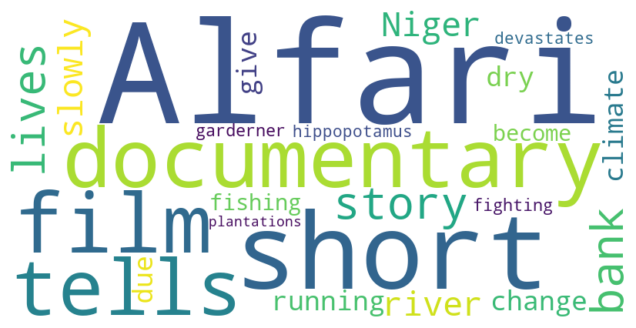

In [124]:

from wordcloud import WordCloud
# Assuming 'tx3' contains the text data you want to create a word cloud from
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(tx3)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
# svm
#supervised 
#hyperplane 
#support vectors